In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\cabra\Documents\Machine Learning\time_series_covid19_confirmed_global.csv.txt')
data_1 = pd.read_csv(r'C:\Users\cabra\Documents\Machine Learning\time_series_covid19_deaths_global.csv.txt')


In [3]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,Falkland Islands (Malvinas),Saint Pierre and Miquelon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
Lat,33,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,-13.2543,-51.7963,46.8852,6.877,24.2155,0.18636,15.5527,-11.6455,38.861,-29.61
Long,65,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,34.3015,-59.5236,-56.3159,31.307,-12.8858,6.61308,48.5164,43.3333,71.2761,28.2336
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/11/20,4687,872,5891,755,45,25,6278,3392,107,3053,...,57,13,1,156,6,208,56,11,661,0
5/12/20,4963,876,6067,758,45,25,6563,3538,107,3059,...,57,13,1,194,6,208,65,11,729,0
5/13/20,5226,880,6253,760,45,25,6879,3718,107,3063,...,63,13,1,203,6,220,70,11,801,1
5/14/20,5639,898,6442,761,48,25,7134,3860,107,3071,...,63,13,1,203,6,235,85,11,907,1


In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48


In [5]:
data = data.drop(columns = ['Province/State', 'Lat', 'Long'],axis = 1)

In [6]:
df = data.copy()

In [7]:
lux = df[df['Country/Region'] == 'Luxembourg'].transpose()

In [8]:
lux = lux.iloc[1:]

In [9]:
lux = lux.rename(columns = {151: 'Number of Cases'})

In [10]:
lux.index = pd.to_datetime(lux.index)

In [11]:
lux.index.freq = 'D'

In [12]:
lux

,Number of Cases
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-05-11,3888
2020-05-12,3894
2020-05-13,3904
2020-05-14,3915


In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

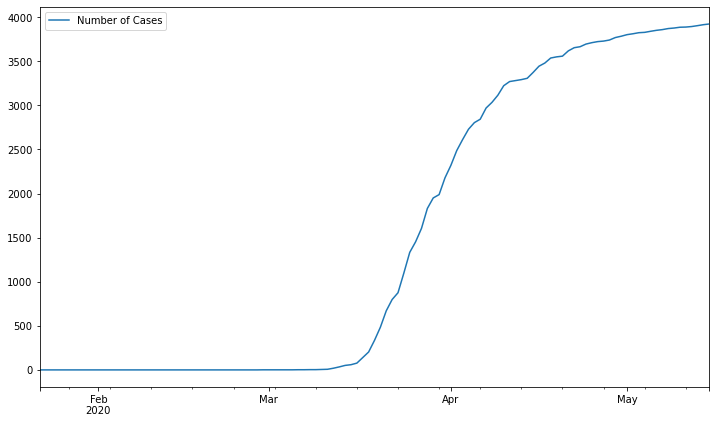

In [14]:
lux.plot(legend = True)

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    print()
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [17]:
adf_test(lux['Number of Cases'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.787852
p-value                   0.822664
# lags used              13.000000
# observations          101.000000
critical value (1%)      -3.496818
critical value (5%)      -2.890611
critical value (10%)     -2.582277

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [18]:
data_1 = data_1.drop(columns = ['Province/State', 'Lat', 'Long'], axis = 1)

In [19]:
lux_death = data_1[data_1['Country/Region'] == 'Luxembourg'].transpose()

In [23]:
lux_death = lux_death[1:]

In [24]:
lux_death = lux_death.rename(columns = {151:'Number of Deaths'})

In [22]:
lux_copy = lux.copy()

In [25]:
lux_copy = pd.concat([lux_copy,lux_death],1)

In [27]:
lux_copy.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
               '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15'],
              dtype='datetime64[ns]', length=115, freq='D')

In [28]:
lux_diff = lux_copy.diff()

In [29]:
adf_test(lux_copy['Number of Cases'])
adf_test(lux_copy['Number of Deaths']) #1 difference

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.787852
p-value                   0.822664
# lags used              13.000000
# observations          101.000000
critical value (1%)      -3.496818
critical value (5%)      -2.890611
critical value (10%)     -2.582277

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey-Fuller Test: 
ADF test statistic       -1.398248
p-value                   0.583116
# lags used              11.000000
# observations          103.000000
critical value (1%)      -3.495493
critical value (5%)      -2.890037
critical value (10%)     -2.581971

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [36]:
lux_diff = lux_copy.diff().diff().diff()

In [38]:
adf_test(lux_diff['Number of Cases'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.445990e+00
p-value                 4.754214e-16
# lags used             7.000000e+00
# observations          1.040000e+02
critical value (1%)    -3.494850e+00
critical value (5%)    -2.889758e+00
critical value (10%)   -2.581822e+00

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [39]:
luxe = lux_copy.copy()

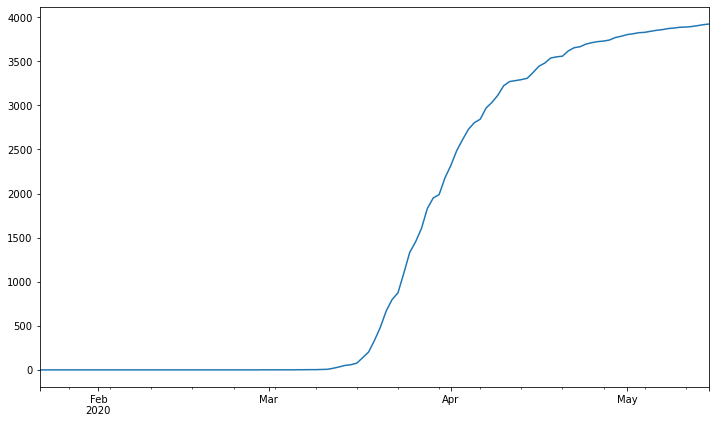

In [40]:
luxe['Number of Cases'].plot()

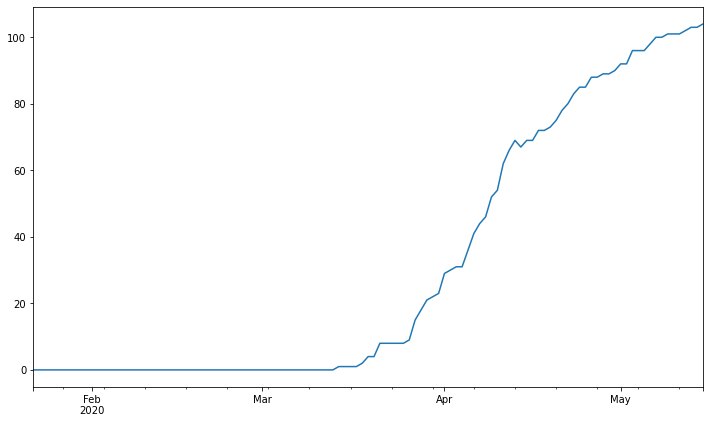

In [41]:
luxe['Number of Deaths'].plot()

In [51]:
luxe['Number of Cases'] = luxe['Number of Cases'].astype(int)
luxe['Number of Deaths'] = luxe['Number of Deaths'].astype(int)

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
import itertools
import warnings
warnings.filterwarnings('ignore')

p = d = q = range(0,5)
pdq = list(itertools.product(p,d,q))


In [54]:
for i in pdq:
    try:
        c_model = ARIMA(luxe['Number of Cases'], order = i).fit()
        print(i,'--',c_model.aic)
    except:
        continue #4,2,2

(0, 0, 0) -- 2036.4419198327444
(0, 0, 1) -- 1885.3279161733433
(0, 1, 0) -- 1247.5442725684827
(0, 1, 1) -- 1166.9607904441887
(0, 1, 2) -- 1160.3607304862041
(0, 1, 3) -- 1140.4309645383426
(0, 1, 4) -- 1118.9323669127834
(0, 2, 0) -- 1124.932869143183
(0, 2, 1) -- 1102.771352888503
(0, 2, 2) -- 1101.6319630020985
(0, 2, 3) -- 1087.3659599114221
(0, 2, 4) -- 1087.9878719418873
(1, 0, 0) -- 1303.4141681536998
(1, 1, 0) -- 1126.1489111091669
(1, 1, 1) -- 1112.5890507306399
(1, 1, 2) -- 1111.58805252833
(1, 1, 3) -- 1097.0180449888921
(1, 1, 4) -- 1097.0022820316935
(1, 2, 0) -- 1118.2838175017212
(1, 2, 1) -- 1104.1237979971804
(1, 2, 2) -- 1093.7645626106364
(1, 2, 3) -- 1086.654906893293
(1, 2, 4) -- 1088.4358667688157
(2, 0, 0) -- 1152.1075203618398
(2, 0, 1) -- 1131.0478221026706
(2, 0, 2) -- 1129.6862060804856
(2, 0, 3) -- 1115.7238876932643
(2, 0, 4) -- 1116.8898408026457
(2, 1, 0) -- 1123.6367270389267
(2, 1, 1) -- 1113.9999325543922
(2, 1, 2) -- 1103.7334335462897
(2, 1, 3) -- 

In [55]:
for i in pdq:
    try:
        c_model = ARIMA(luxe['Number of Deaths'], order = i).fit()
        print(i,'--',c_model.aic)
    except:
        continue #3,2,4

(0, 0, 0) -- 1173.32858351597
(0, 0, 1) -- 1027.652883109081
(0, 1, 0) -- 439.7527973877071
(0, 1, 1) -- 432.7832042062081
(0, 1, 2) -- 419.3670707848424
(0, 1, 3) -- 421.2072899771388
(0, 1, 4) -- 421.11491687396574
(0, 2, 0) -- 464.3671800953171
(0, 2, 1) -- 404.98996920992977
(0, 2, 2) -- 406.8522725996841
(0, 2, 3) -- 407.5542355805195
(0, 2, 4) -- 406.2901131200575
(1, 0, 0) -- 494.69183837025145
(1, 1, 0) -- 425.9099999859594
(1, 1, 1) -- 407.59903234467004
(1, 1, 2) -- 409.3794304893655
(1, 2, 0) -- 424.480866745727
(1, 2, 1) -- 406.81611509963864
(1, 2, 2) -- 405.4190588232741
(1, 2, 3) -- 405.94003061873656
(1, 2, 4) -- 407.5667634507093
(2, 0, 0) -- 460.41391964618407
(2, 1, 0) -- 413.1812003505958
(2, 1, 1) -- 409.3225090356284
(2, 2, 0) -- 423.7283468799211
(2, 2, 1) -- 407.4465438662315
(2, 2, 2) -- 406.1385977409438
(2, 2, 3) -- 407.89985053279923
(2, 2, 4) -- 408.61574044493733
(3, 0, 0) -- 443.92331067693516
(3, 1, 0) -- 415.1011422655661
(3, 1, 1) -- 410.0891337938539


In [60]:
luxe.shape[0] -28

87

# Model 

In [88]:
train = luxe[:-21]
test = luxe[-21:]

In [89]:
train['Number of Cases']

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-04-20    3558
2020-04-21    3618
2020-04-22    3654
2020-04-23    3665
2020-04-24    3695
Freq: D, Name: Number of Cases, Length: 94, dtype: int32

### Cases Prediction Model

In [90]:
train_model = ARIMA(train['Number of Cases'], order = (4,2,2)).fit()

In [91]:
train_model_predictions = train_model.predict(len(train), len(train) + len(test) - 1, typ = 'levels').rename('Test ARIMA Predictions')

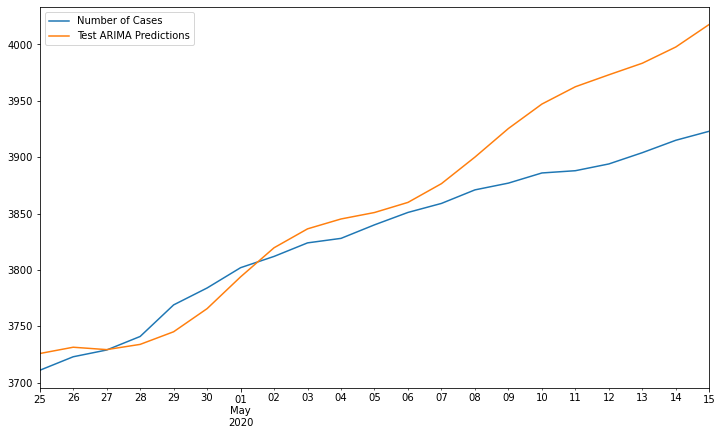

In [92]:
test['Number of Cases'].plot(legend = True)
train_model_predictions.plot(legend = True)

In [239]:
np.sqrt(mean_squared_error(test['Number of Cases'], train_model_predictions))

45.333179502560434

In [240]:
test['Number of Cases'].mean()

3830.0476190476193

In [93]:
final_cases_model = ARIMA(luxe['Number of Cases'], order = (4,2,2)).fit()

In [189]:
final_cases_pred = final_cases_model.predict(len(luxe), len(luxe) + 21, typ = 'levels').rename('COVID - 19 Cases Prediction')

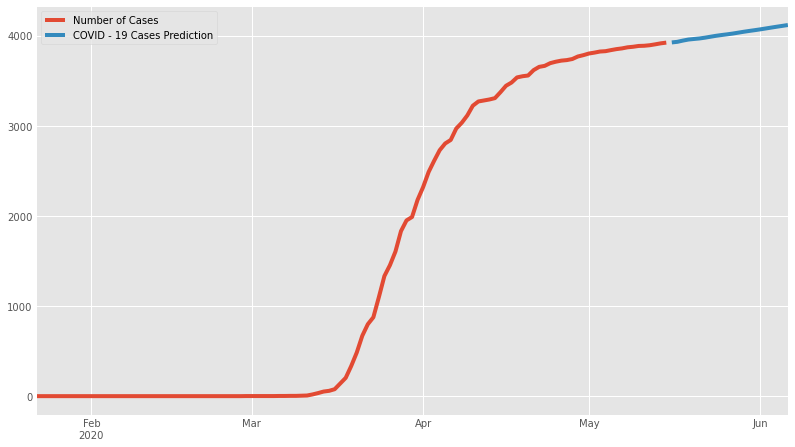

In [190]:
luxe['Number of Cases'].plot(legend = True)
final_cases_pred.plot(legend = True)

In [185]:
round(final_cases_pred)

2020-05-16    3925.0
2020-05-17    3932.0
2020-05-18    3945.0
2020-05-19    3957.0
2020-05-20    3963.0
2020-05-21    3969.0
2020-05-22    3978.0
2020-05-23    3988.0
2020-05-24    3999.0
2020-05-25    4007.0
2020-05-26    4015.0
2020-05-27    4023.0
2020-05-28    4033.0
2020-05-29    4043.0
2020-05-30    4053.0
Freq: D, Name: COVID - 19 Cases Prediction, dtype: float64

### Deaths Prediction Model

In [146]:
death_train = luxe[:-14]
death_test = luxe[-14:]

In [108]:
from pmdarima import auto_arima

In [109]:
auto_ar = auto_arima(luxe['Number of Deaths'], seasonal = False, trace = True)

Performing stepwise search to minimize aic
Fit ARIMA(2,2,2)x(0,0,0,0) [intercept=True]; AIC=406.139, BIC=422.503, Time=0.504 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=464.367, BIC=469.822, Time=0.016 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=424.481, BIC=432.663, Time=0.016 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=404.990, BIC=413.172, Time=0.062 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=462.370, BIC=465.097, Time=0.016 seconds
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=406.816, BIC=417.726, Time=0.126 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=406.852, BIC=417.762, Time=0.091 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=405.419, BIC=419.056, Time=0.193 seconds
Total fit time: 1.057 seconds


In [147]:
test_model_death = ARIMA(death_train['Number of Deaths'], order = (3,2,4)).fit()

In [149]:
test_death_pred = test_model_death.predict(len(death_train), len(death_train) + len(death_test) - 1, typ = 'levels').rename('Test Model Prediction')

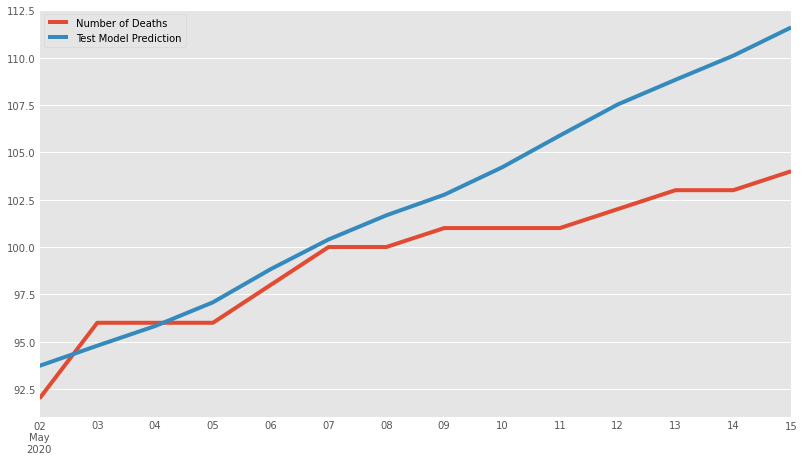

In [238]:
death_test['Number of Deaths'].plot(legend = True)
test_death_pred.plot(legend = True)

In [137]:
from sklearn.metrics import mean_squared_error

In [236]:
np.sqrt(mean_squared_error(death_test['Number of Deaths'], test_death_pred))

3.956350421133132

In [237]:
test['Number of Deaths'].mean()

95.9047619047619

In [143]:
test['Number of Deaths']

2020-04-25     85
2020-04-26     88
2020-04-27     88
2020-04-28     89
2020-04-29     89
2020-04-30     90
2020-05-01     92
2020-05-02     92
2020-05-03     96
2020-05-04     96
2020-05-05     96
2020-05-06     98
2020-05-07    100
2020-05-08    100
2020-05-09    101
2020-05-10    101
2020-05-11    101
2020-05-12    102
2020-05-13    103
2020-05-14    103
2020-05-15    104
Freq: D, Name: Number of Deaths, dtype: int32

In [144]:
test_death_pred

2020-04-25     87.312989
2020-04-26     89.652320
2020-04-27     92.017993
2020-04-28     94.410008
2020-04-29     96.828364
2020-04-30     99.273062
2020-05-01    101.744103
2020-05-02    104.241485
2020-05-03    106.765209
2020-05-04    109.315274
2020-05-05    111.891682
2020-05-06    114.494431
2020-05-07    117.123523
2020-05-08    119.778956
2020-05-09    122.460731
2020-05-10    125.168848
2020-05-11    127.903306
2020-05-12    130.664107
2020-05-13    133.451249
2020-05-14    136.264734
2020-05-15    139.104560
Freq: D, Name: Test Model Prediction, dtype: float64

In [155]:
final_death_model = ARIMA(luxe['Number of Deaths'], order = (3,2,4)).fit()

In [187]:
final_death_pred = final_death_model.predict(len(luxe), len(luxe) + 21, typ = 'levels').rename('COVID - 19 Deaths Prediction')

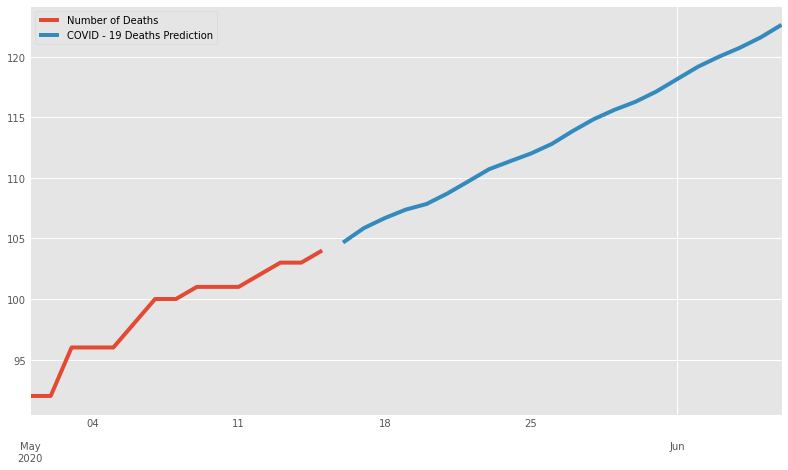

In [246]:
luxe['Number of Deaths'].loc['2020-05-01':].plot(legend = True)
final_death_pred.plot(legend = True)

In [245]:
luxe['Number of Cases']['2020-05-01']

3802

In [244]:
round(final_death_pred)

2020-05-16    105.0
2020-05-17    106.0
2020-05-18    107.0
2020-05-19    107.0
2020-05-20    108.0
2020-05-21    109.0
2020-05-22    110.0
2020-05-23    111.0
2020-05-24    111.0
2020-05-25    112.0
2020-05-26    113.0
2020-05-27    114.0
2020-05-28    115.0
2020-05-29    116.0
2020-05-30    116.0
2020-05-31    117.0
2020-06-01    118.0
2020-06-02    119.0
2020-06-03    120.0
2020-06-04    121.0
2020-06-05    122.0
2020-06-06    123.0
Freq: D, Name: COVID - 19 Deaths Prediction, dtype: float64

In [191]:
from datetime import datetime
from matplotlib import dates

In [176]:
plt.style.use('ggplot')

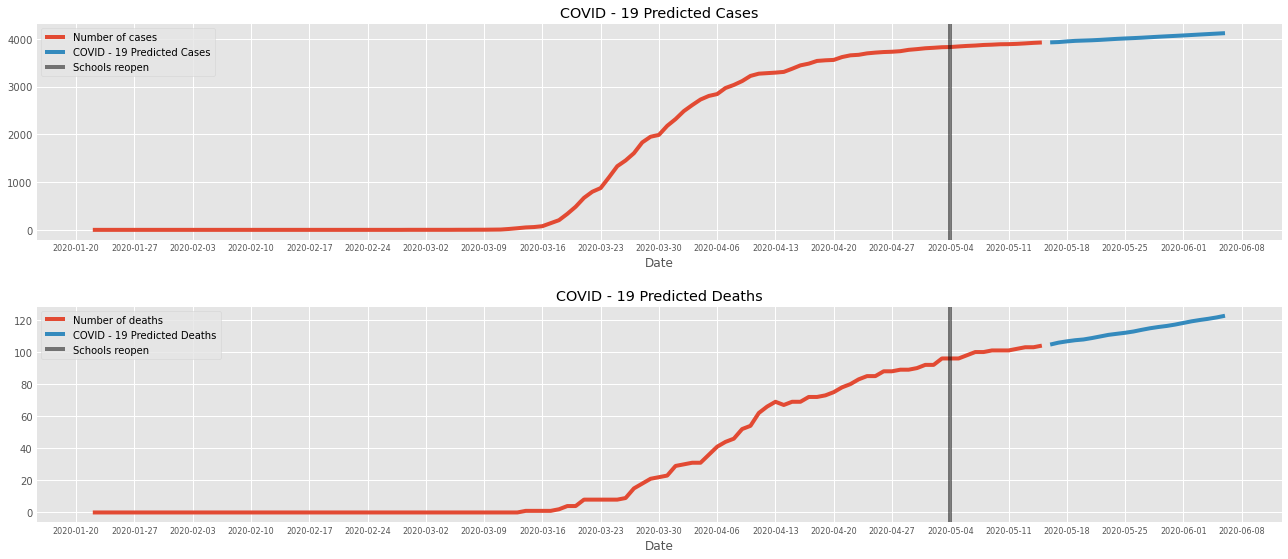

In [234]:
fig, axs = plt.subplots(2, figsize = (18,8))
#fig.tight_layout(pad = 50.0)
fig.subplots_adjust(hspace=30)
axs[0].plot(luxe['Number of Cases'], label = 'Number of cases')
axs[0].plot(final_cases_pred, label = 'COVID - 19 Predicted Cases')
axs[0].axvline(x = datetime(2020,5,4), color = 'black', alpha = 0.5, label = 'Schools reopen')
axs[0].set_title('COVID - 19 Predicted Cases')
axs[0].set_xlabel('Date')
axs[0].legend()
axs[0].xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0))
#axs[0].xaxis.set_major_formatter(dates.DateFormatter('%y-%m-%d'))
axs[0].tick_params(axis = 'x', labelsize = 8)
axs[1].plot(luxe['Number of Deaths'], label = 'Number of deaths')
axs[1].plot(final_death_pred, label = 'COVID - 19 Predicted Deaths')
axs[1].set_title('COVID - 19 Predicted Deaths')
axs[1].axvline(x = datetime(2020,5,4), color = 'black', alpha = 0.5, label = 'Schools reopen')
axs[1].legend()
axs[1].xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0))
#axs[1].xaxis.set_major_formatter(dates.DateFormatter('%y-%m-%d'))
axs[1].tick_params(axis = 'x', labelsize = 8)
axs[1].set_xlabel('Date')
plt.tight_layout()
plt.savefig('COVID-19 Prediction-16_05')

In [225]:
round(final_death_pred)

2020-05-16    105.0
2020-05-17    106.0
2020-05-18    107.0
2020-05-19    107.0
2020-05-20    108.0
2020-05-21    109.0
2020-05-22    110.0
2020-05-23    111.0
2020-05-24    111.0
2020-05-25    112.0
2020-05-26    113.0
2020-05-27    114.0
2020-05-28    115.0
2020-05-29    116.0
2020-05-30    116.0
2020-05-31    117.0
2020-06-01    118.0
2020-06-02    119.0
2020-06-03    120.0
2020-06-04    121.0
2020-06-05    122.0
2020-06-06    123.0
Freq: D, Name: COVID - 19 Deaths Prediction, dtype: float64

In [226]:
round(final_cases_pred)

2020-05-16    3925.0
2020-05-17    3932.0
2020-05-18    3945.0
2020-05-19    3957.0
2020-05-20    3963.0
2020-05-21    3969.0
2020-05-22    3978.0
2020-05-23    3988.0
2020-05-24    3999.0
2020-05-25    4007.0
2020-05-26    4015.0
2020-05-27    4023.0
2020-05-28    4033.0
2020-05-29    4043.0
2020-05-30    4053.0
2020-05-31    4061.0
2020-06-01    4070.0
2020-06-02    4080.0
2020-06-03    4090.0
2020-06-04    4100.0
2020-06-05    4109.0
2020-06-06    4118.0
Freq: D, Name: COVID - 19 Cases Prediction, dtype: float64

In [232]:
final_df = pd.DataFrame([round(final_cases_pred),round(final_death_pred)])

In [233]:
final_df.transpose()

,COVID - 19 Cases Prediction,COVID - 19 Deaths Prediction
2020-05-16,3925.0,105.0
2020-05-17,3932.0,106.0
2020-05-18,3945.0,107.0
2020-05-19,3957.0,107.0
2020-05-20,3963.0,108.0
2020-05-21,3969.0,109.0
2020-05-22,3978.0,110.0
2020-05-23,3988.0,111.0
2020-05-24,3999.0,111.0
2020-05-25,4007.0,112.0
